## 4.1 RBM for recognisisng MNIST images

Import libraries

In [4]:
from dbn import DeepBeliefNet
from rbm import RestrictedBoltzmannMachine
from util import *
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
title_font = {'fontname':'Arial', 'size':'14', 'color':'black', 'weight':'bold', 'family':'monospace'}


Load datasets (train and test with their labels)

In [5]:
image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000) 

Create RBM1:
  - Visible layer: 28 x 28 pixel image
  
  - Hidden layer: 500 untis

In [6]:
n_iterations = 20

rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                 ndim_hidden=500,
                                 is_bottom=True, 
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=20
                                 )

# rbm.cd1(visible_trainset=train_imgs, iterations_number=n_iterations)
losses, delta_weight_vh_norm, delta_bias_v_norm, delta_bias_h_norm = rbm.cd1(visible_trainset=train_imgs, n_iterations=n_iterations)


Learning CD1


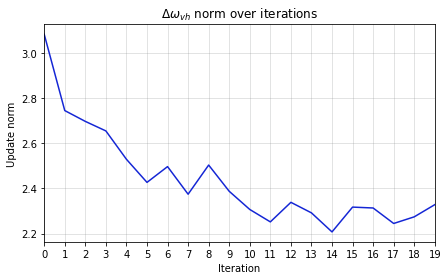

In [ ]:
plt.figure(figsize=(7, 4)) 
plt.plot(range(n_iterations),delta_weight_vh_norm, color='#1426D5',label='$\Delta \omega_{vh}$ norm')
# plt.legend(loc='upper right', fontsize='10')
plt.grid(b=True, which='major', color='#8A8C8D', alpha=0.3, linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Update norm')
plt.xticks(range(0, n_iterations))
plt.xlim(0,n_iterations-1)
plt.title("$\Delta \omega_{vh}$ norm over iterations", title_font)
plt.tight_layout()
plt.savefig('figures/norm_delta_vh_iterations.pdf', dpi=1000.0)
plt.show()  

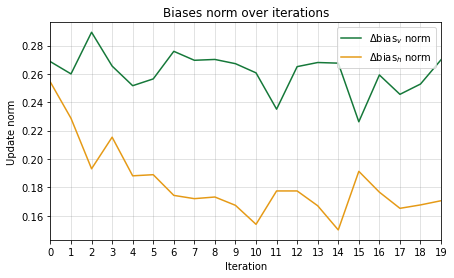

In [ ]:
plt.figure(figsize=(7, 4)) 
plt.plot(range(n_iterations),delta_bias_v_norm, color='#157839',label='$\Delta$bias$_{v}$ norm')
plt.plot(range(n_iterations),delta_bias_h_norm, color='#E59A16',label='$\Delta$bias$_{h}$ norm')
plt.legend(loc='upper right', fontsize='10')
plt.grid(b=True, which='major', color='#8A8C8D', alpha=0.3, linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Update norm')
plt.xticks(range(0, n_iterations))
plt.xlim(0,n_iterations-1)
plt.title("Biases norm over iterations", title_font)
plt.tight_layout()
plt.savefig('figures/norm_bias_iterations.pdf', dpi=1000.0)
plt.show()  

In [ ]:
n_units = np.arange(200, 501, 100)
n_iterations = 20

reconstruction_losses = []

for n in n_units:

  print("{} hidden units".format(n))
  
  rbm_comparison = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                 ndim_hidden=n,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=20
                                 )

  rec_losses, _, _, _ = rbm_comparison.cd1(visible_trainset=train_imgs, n_iterations=n_iterations)
  
  reconstruction_losses.append(rec_losses)

  print("______________")

200 hidden units
Learning CD1
Iteration = 0: recon_loss = 0.0157
Iteration = 1: recon_loss = 0.0144
Iteration = 2: recon_loss = 0.0137
Iteration = 3: recon_loss = 0.0134
Iteration = 4: recon_loss = 0.0132
Iteration = 5: recon_loss = 0.0129
Iteration = 6: recon_loss = 0.0129
Iteration = 7: recon_loss = 0.0126
Iteration = 8: recon_loss = 0.0126
Iteration = 9: recon_loss = 0.0125
Iteration = 10: recon_loss = 0.0125
Iteration = 11: recon_loss = 0.0123
Iteration = 12: recon_loss = 0.0122
Iteration = 13: recon_loss = 0.0121
Iteration = 14: recon_loss = 0.0122
Iteration = 15: recon_loss = 0.0123
Iteration = 16: recon_loss = 0.0120
Iteration = 17: recon_loss = 0.0120
Iteration = 18: recon_loss = 0.0120
Iteration = 19: recon_loss = 0.0120
______________
300 hidden units
Learning CD1
Iteration = 0: recon_loss = 0.0153
Iteration = 1: recon_loss = 0.0142
Iteration = 2: recon_loss = 0.0136
Iteration = 3: recon_loss = 0.0132
Iteration = 4: recon_loss = 0.0129
Iteration = 5: recon_loss = 0.0127
Itera

In [ ]:
# print(np.shape(reconstruction_losses))
# print(reconstruction_losses[0])
n_iterations = 20
plt.figure(figsize=(6.5, 3.6)) 
plt.plot(range(n_iterations), reconstruction_losses[0], color='#15A54A',label='200 units')
plt.plot(range(n_iterations),reconstruction_losses[1], color='#E1690B',label='300 units')
plt.plot(range(n_iterations),reconstruction_losses[2], color='#176CBB',label='400 units')
plt.plot(range(n_iterations),reconstruction_losses[3], color='#EE1010',label='500 units')
plt.legend(loc='upper right', fontsize='10')
plt.grid(b=True, which='major', color='#8A8C8D', alpha=0.3, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Reconstruction loss')
plt.xticks(range(0, n_iterations))
plt.xlim(0,n_iterations-1)
plt.title("Average reconstruction loss", title_font)
plt.tight_layout()
plt.savefig('figures/comparison_units_epochs.pdf', dpi=1000.0)
plt.show()  

NameError: name 'plt' is not defined

c:\Users\Francisco Javier\OneDrive - Universidad Politécnica de Madrid\KTH\P3\DD2437_ANN-Deep-Architectures\Labs\Lab4\code\rbm.py:420: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Francisco Javier\OneDrive - Universidad Politécnica de Madrid\KTH\P3\DD2437_ANN-Deep-Architectures\Labs\Lab4\code\rbm.py:420: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Francisco Javier\OneDrive - Universidad Politécnica de Madrid\KTH\P3\DD2437_ANN-Deep-Architectures\Labs\Lab4\code\rbm.py:420: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Francisco Javier\OneDrive - Universidad Politécnica de Madrid\KTH\P3\DD2437_ANN-Deep-Architectures\Labs\Lab4\code\rbm.py:420

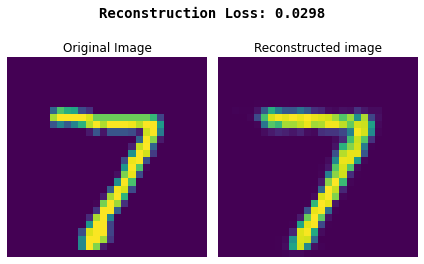

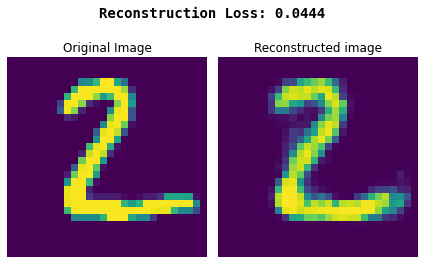

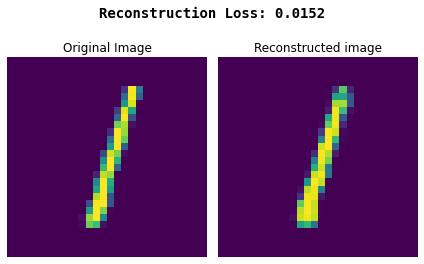

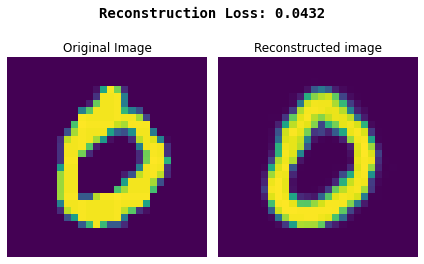

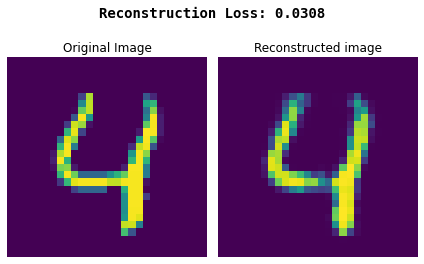

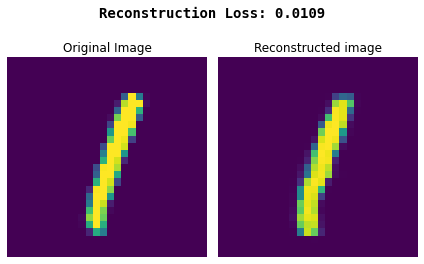

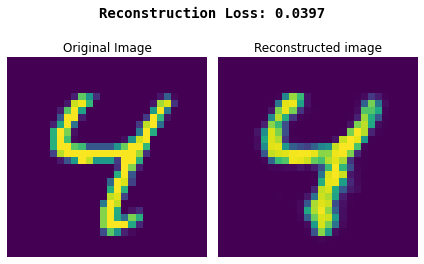

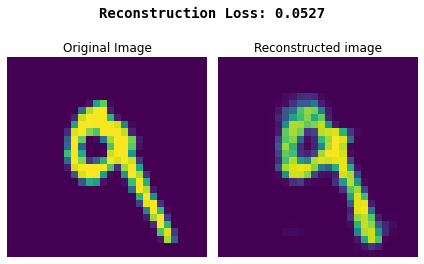

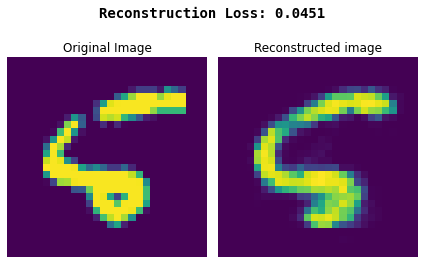

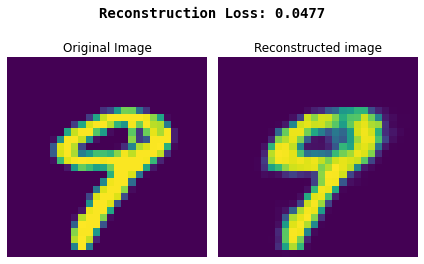

In [ ]:
images = test_imgs[0:10][:]
image_size = [28, 28]

rbm.visualize_reconstruction(images, image_size)  

In [ ]:
recon_losses = rbm.compute_reconstruction_losses(test_imgs)

print("The mean reconstructed loss is: {:.5f}".format(np.mean(losses)))

The mean reconstructed loss is: 0.01309
